In [10]:
from dbfread import DBF
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import STL


plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

In [11]:
os.getcwd()

'c:\\Users\\yis82\\OneDrive\\Desktop\\bigdata_analysis'

------------

수정을 위해서 데이터 주소만 변경

In [12]:
# df = DBF('./데이터\\B422. 서울시 누적강수량(월평균) 공간데이터\\2. 파일데이터\\2019\\TL_RFL_AGE_2019.dbf',encoding='euc-kr', load=True)
# dbf = pd.DataFrame(df)
# dbf

In [13]:
df = DBF('./데이터\\B422. 서울시 누적강수량(월평균) 공간데이터\\2. 파일데이터\\2019\\TL_RFL_AGE_2019.dbf',encoding='euc-kr', load=True)
dbf = pd.DataFrame(df)
dbf

DBFNotFound: could not find file './데이터\\B422. 서울시 누적강수량(월평균) 공간데이터\\2. 파일데이터\\2019\\TL_RFL_AGE_2019.dbf'

----------

In [ ]:
stationarity = False

In [ ]:
for i in range(1, 13):
    column_name = f'M0{i}' if i < 10 else f'M{i}'  
    missing_count = dbf[column_name].isna().sum()
    print(f'Column {column_name}: {missing_count} missing values')


Column M01: 0 missing values
Column M02: 0 missing values
Column M03: 0 missing values
Column M04: 0 missing values
Column M05: 0 missing values
Column M06: 0 missing values
Column M07: 0 missing values
Column M08: 0 missing values
Column M09: 0 missing values
Column M10: 0 missing values
Column M11: 0 missing values
Column M12: 0 missing values


In [ ]:
col_name = []
for i in range(1, 13):
    column_name = f'M0{i}' if i < 10 else f'M{i}'  
    missing_count = dbf[column_name].fillna(1, inplace= True)
    col_name.append(column_name)


In [ ]:
condition = dbf['NAME'] == '[기]서울'

In [ ]:
seoul_df = dbf[condition]
seoul_df.head(3)

,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,...,ADDR_KOR,DGE_X,DGE_Y,DAMDANG,CONTENT,MK_YEAR,ETC,MTHD_NM,CMDT_NM,SOURCETHM
25,0.0,0.0,19.5,38.5,38.0,48.5,1.90,1.13,30.5,19.5,...,종로구 송월길 52(서울기상관측소),"N 37°34' 17.00""","E 126°57' 56.16""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,196961.427,552433.066,07(일누적강수량)
94,4.0,0.0,22.0,47.5,6.5,69.5,1.02,1.37,85.5,44.0,...,종로구 송월길 52(서울기상관측소),"N 37°34' 17.00""","E 126°57' 56.16""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,196961.427,552433.066,07(일누적강수량)
168,14.5,26.5,17.0,27.0,59.0,71.0,89.50,99.00,259.5,15.0,...,종로구 송월길 52(서울기상관측소),"N 37°34' 17.00""","E 126°57' 56.16""",기상청,풍향/풍속/기온/강수량/강수유무/습도,2008,기상청 관측소,196961.427,552433.066,07(일누적강수량)


In [ ]:
melt_df = pd.melt(seoul_df[col_name])
melt_df

,variable,value
0,M01,0.0
1,M01,4.0
2,M01,14.5
3,M01,3.5
4,M01,4.0
...,...,...
115,M12,20.0
116,M12,14.0
117,M12,10.0
118,M12,0.0


In [ ]:
test_df = melt_df.drop('variable', axis = 1)

In [ ]:
start_date = '2010-01-01'
end_date = '2020-01-01'
monthly_index = pd.date_range(start=start_date, end=end_date, freq='M')

# Extract and format only the months and years
formatted_index = monthly_index.strftime('%y-%m')

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

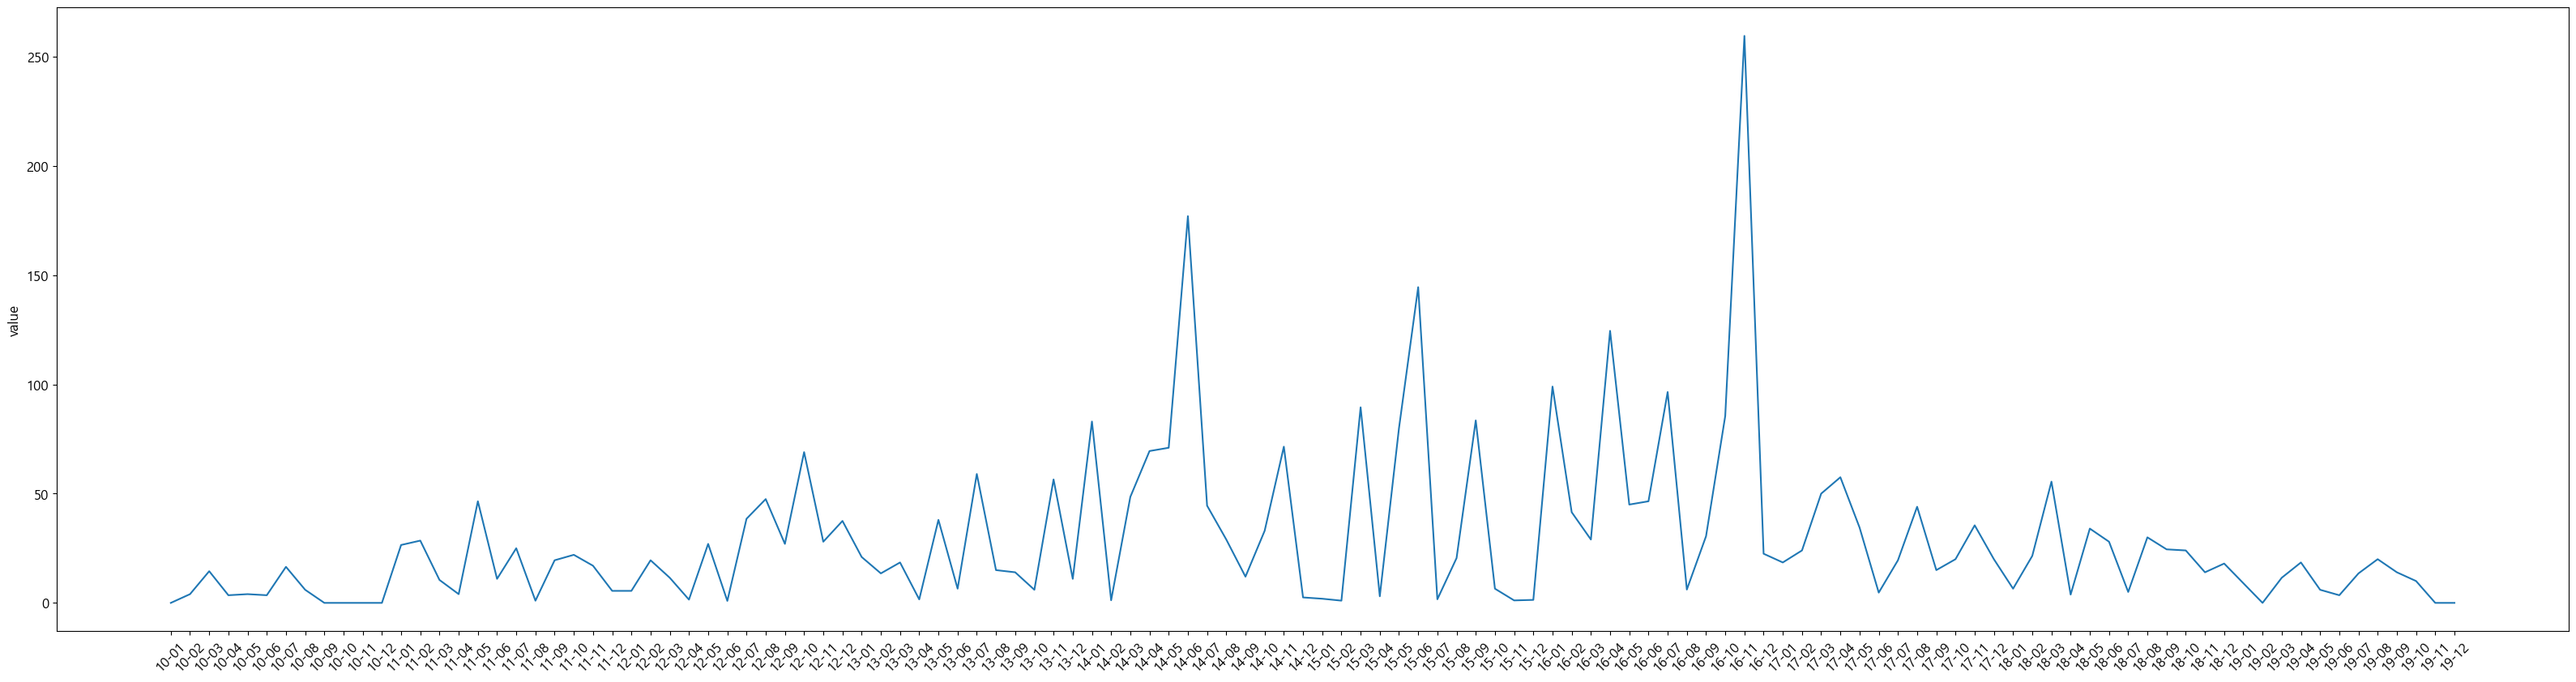

In [ ]:
plt.rcParams["figure.figsize"] = (40, 10)
sb.lineplot(data = test_df, x = formatted_index,  y = 'value')
plt.xticks(rotation= 45)
plt.show()
plt.close()

In [ ]:
test_df['value']

0       0.0
1       4.0
2      14.5
3       3.5
4       4.0
       ... 
115    20.0
116    14.0
117    10.0
118     0.0
119     0.0
Name: value, Length: 120, dtype: float64

In [ ]:
rainfall = pd.Series(test_df['value'])
rainfall

0       0.0
1       4.0
2      14.5
3       3.5
4       4.0
       ... 
115    20.0
116    14.0
117    10.0
118     0.0
119     0.0
Name: value, Length: 120, dtype: float64

In [ ]:
temp_test_df=test_df.set_index(monthly_index)
temp_test_df

,value
2010-01-31,0.0
2010-02-28,4.0
2010-03-31,14.5
2010-04-30,3.5
2010-05-31,4.0
...,...
2019-08-31,20.0
2019-09-30,14.0
2019-10-31,10.0
2019-11-30,0.0


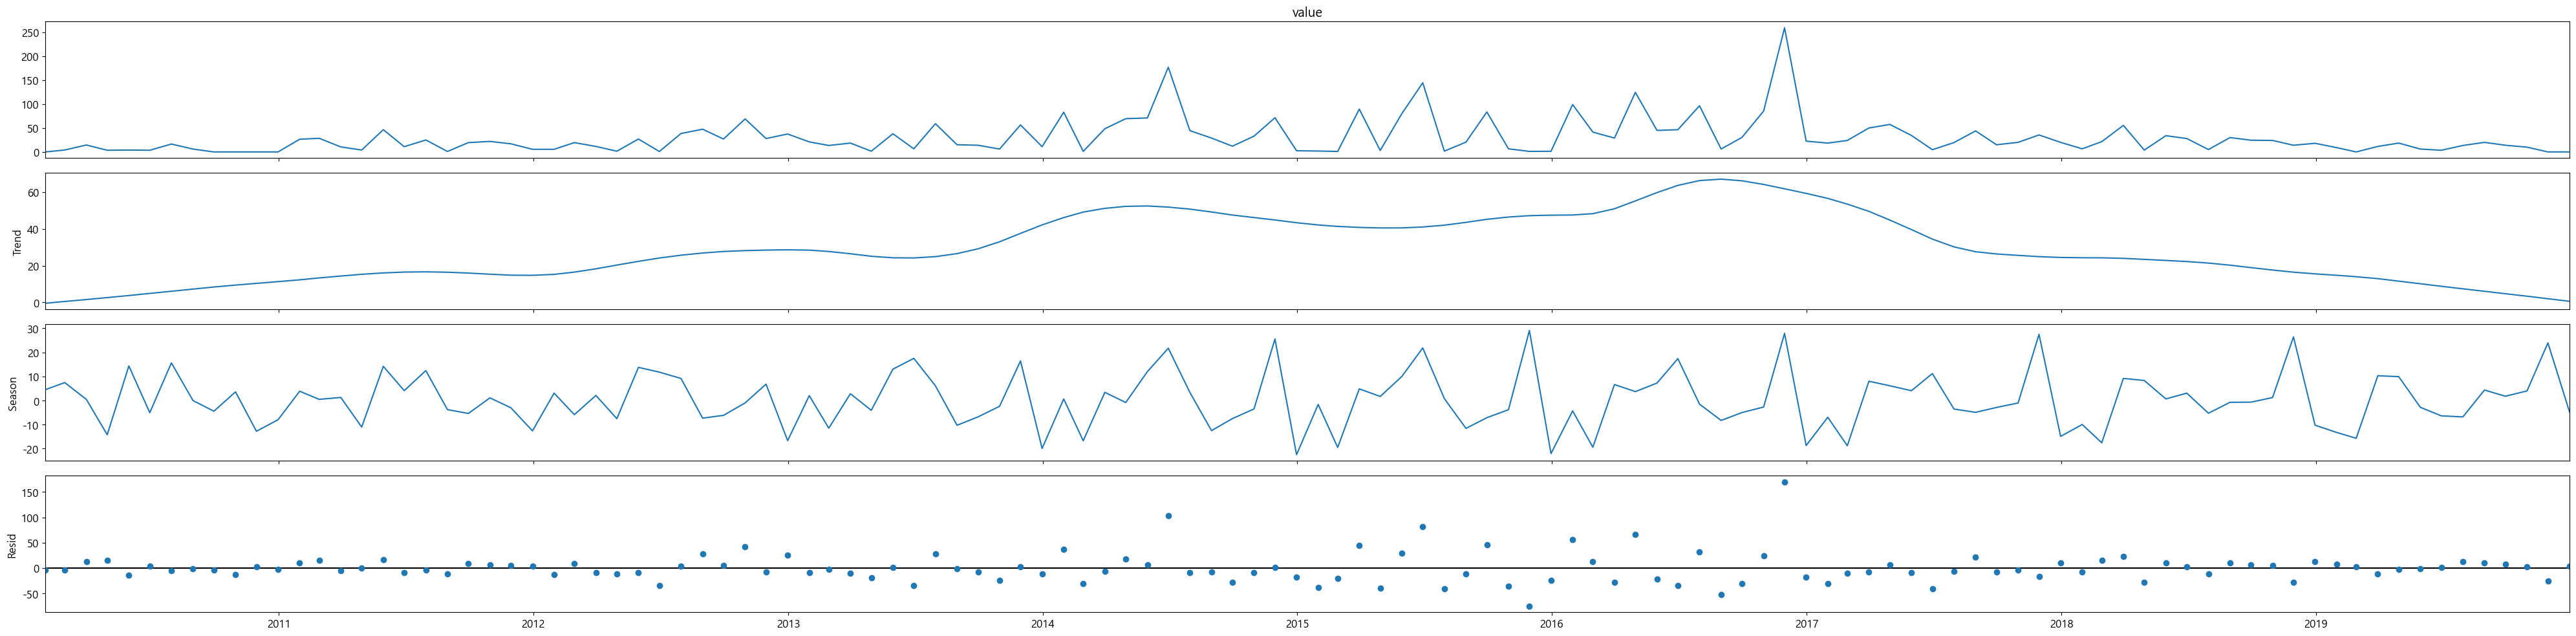

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


# Perform STL decomposition
#stl = STL(rainfall, seasonal=13)  # You can adjust the seasonal period as needed

# test
stl = STL(temp_test_df['value'],seasonal=13)

# Fit the decomposition
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()


In [ ]:
help(STL)

Help on class STL in module statsmodels.tsa.stl._stl:

class STL(builtins.object)
 |  STL(endog, period=None, seasonal=7, trend=None, low_pass=None,
 |      seasonal_deg=1, trend_deg=1, low_pass_deg=1, robust=False,
 |      seasonal_jump=1, trend_jump=1, low_pass_jump=1)
 |  
 |  Season-Trend decomposition using LOESS.
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      Data to be decomposed. Must be squeezable to 1-d.
 |  period : {int, None}, optional
 |      Periodicity of the sequence. If None and endog is a pandas Series or
 |      DataFrame, attempts to determine from endog. If endog is a ndarray,
 |      period must be provided.
 |  seasonal : int, optional
 |      Length of the seasonal smoother. Must be an odd integer, and should
 |      normally be >= 7 (default).
 |  trend : {int, None}, optional
 |      Length of the trend smoother. Must be an odd integer. If not provided
 |      uses the smallest odd integer greater than
 |      1.5 * period / (1 - 1.5 / seas

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}

df = pd.DataFrame(data)

# Convert a specific column to a Series
series_from_column = df['A']

# series_from_column is now a pandas Series
print(series_from_column)

0    1
1    2
2    3
Name: A, dtype: int64


In [ ]:
rainfall = pd.Series(melt_df['value'])
rainfall.name

'value'

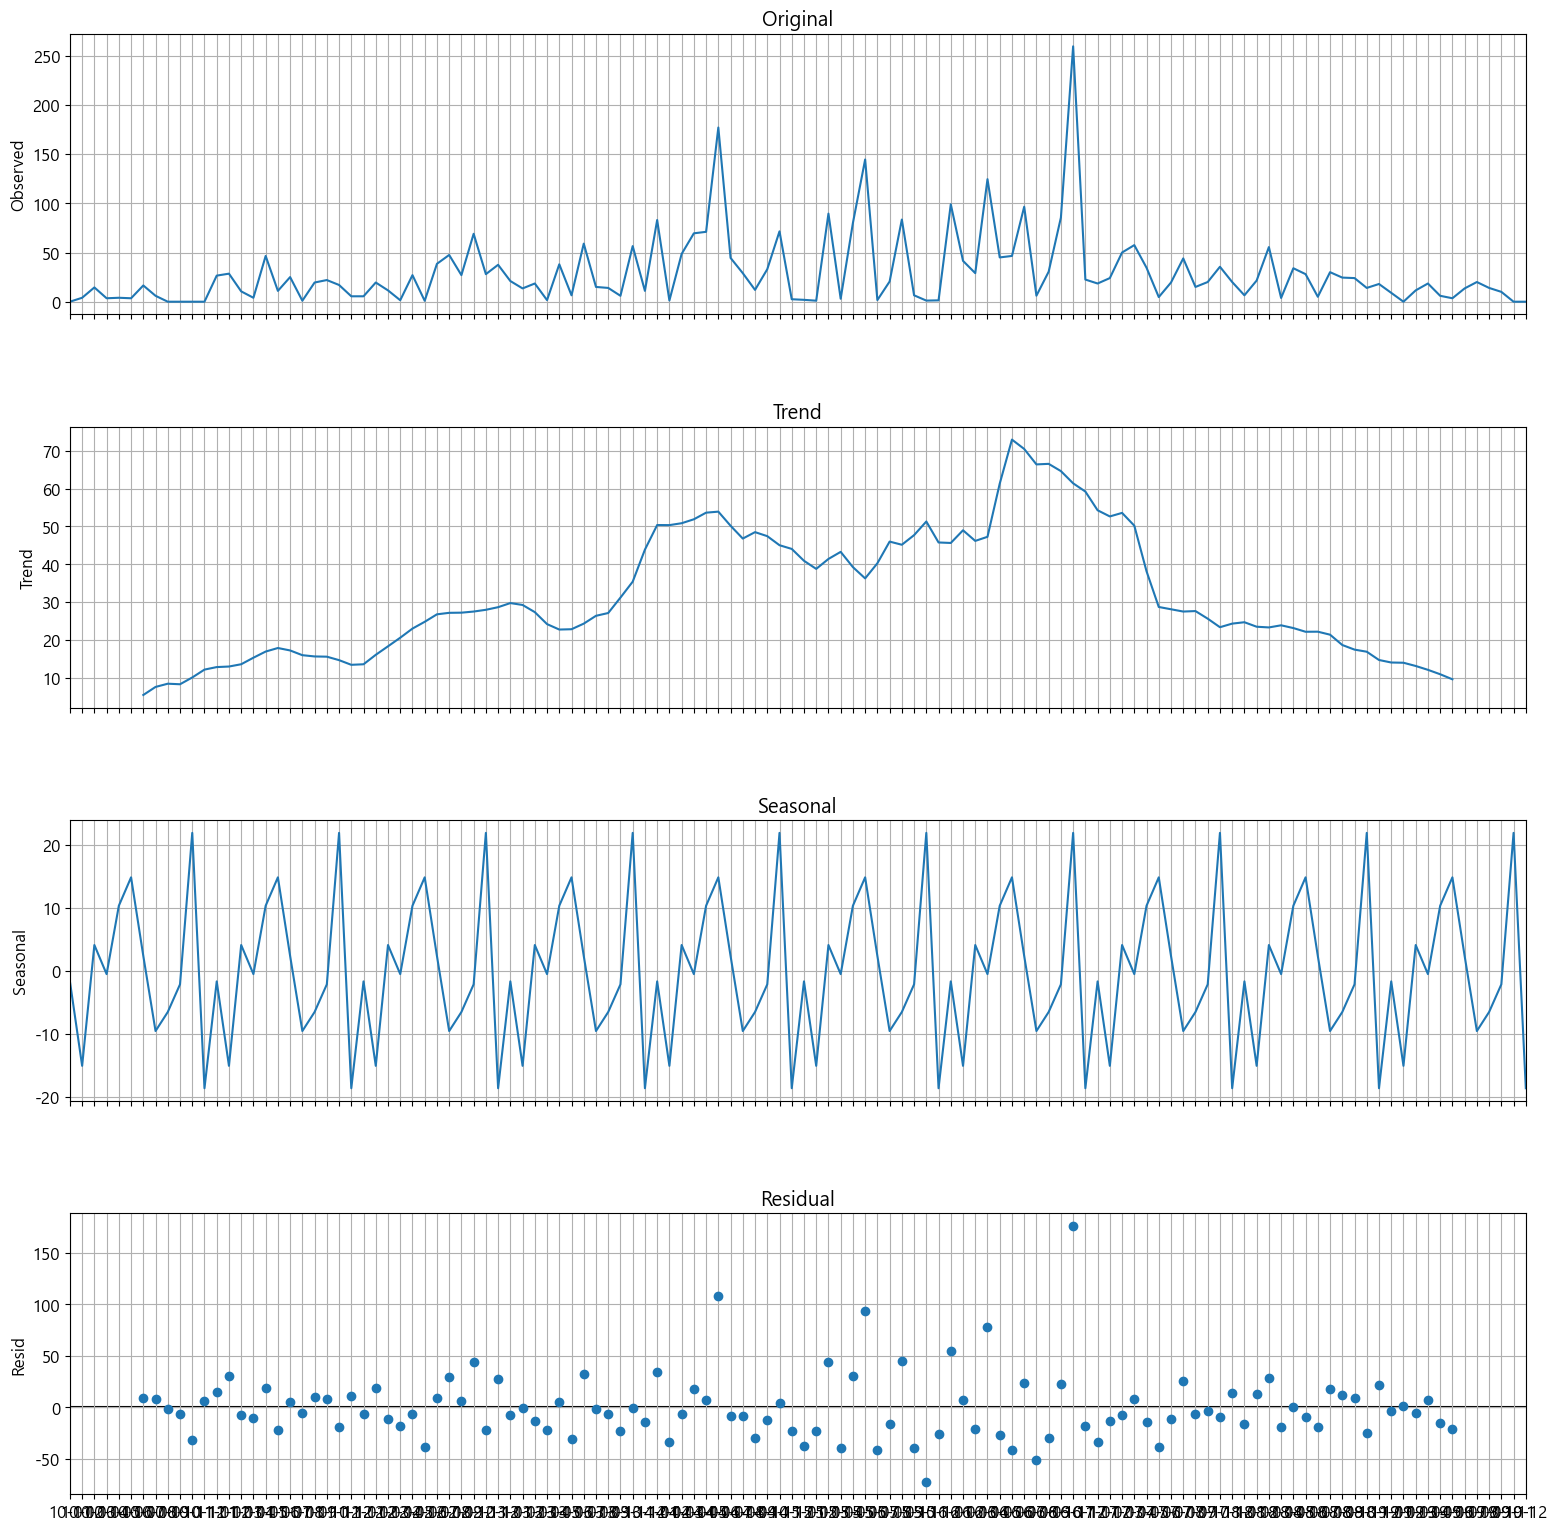

In [ ]:
sd = seasonal_decompose(rainfall, model='additive', period=12)
figure = sd.plot()
figure.set_figwidth(15)
figure.set_figheight(16)
fig, ax1, ax2, ax3, ax4 = figure.get_children()
figure.subplots_adjust(hspace=0.4)
ax1.set_ylabel("Observed")
ax1.grid(True)
ax1.title.set_text("Original")
ax2.grid(True)
ax2.title.set_text("Trend")
ax3.grid(True)
ax3.title.set_text("Seasonal")
ax4.grid(True)
ax4.title.set_text("Residual")
plt.show()



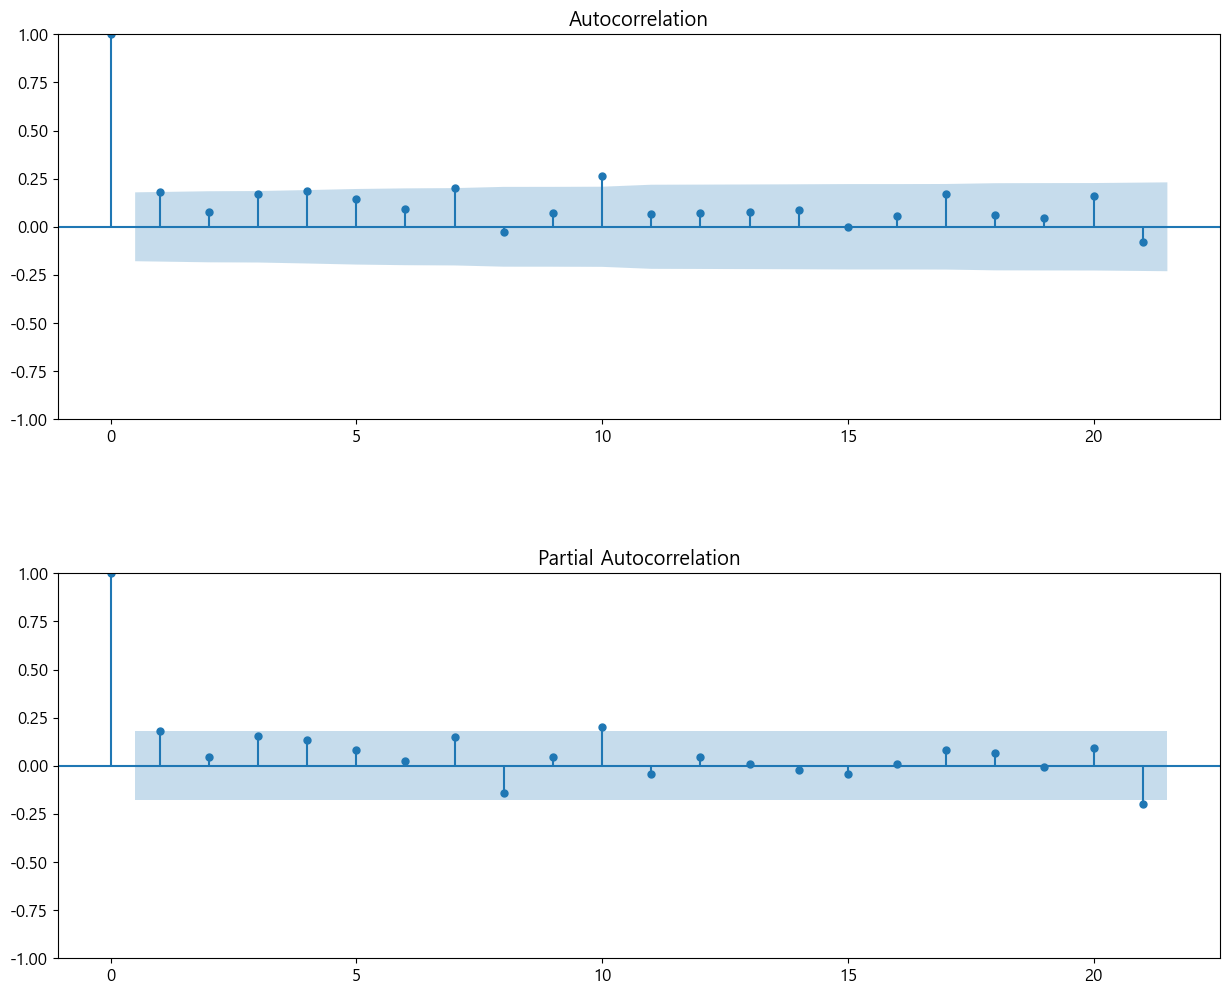

In [ ]:

# ACF, PACF 검정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4)

plot_acf(melt_df['value'], ax=ax1)
ax2.title.set_text("ACF Test")
    
plot_pacf(melt_df['value'], ax=ax2)
ax3.title.set_text("PACF Test")
    
plt.show()
plt.close()

In [ ]:
ar = adfuller(melt_df['value'])
ardict = {
        '검정통계량(ADF Statistic)': [ar[0]],
        '유의수준(p-value)': [ar[1]],
        '최적차수(num of lags)': [ar[2]],
        '관측치 개수(num of observations)': [ar[3]]   
    }

for key, value in ar[4].items():
    ardict['기각값(Critical Values) %s' % key] = value

stationarity = ar[1] < 0.05
ardict['데이터 정상성 여부(0=Flase,1=True)'] = stationarity

ardf = DataFrame(ardict, index=['ADF Test']).T

print(tabulate(ardf, headers=["ADF Test", ""], tablefmt='psql', numalign="right"))


+------------------------------------+-------------+
| ADF Test                           |             |
|------------------------------------+-------------|
| 검정통계량(ADF Statistic)          |    -9.00877 |
| 유의수준(p-value)                  | 6.20748e-15 |
| 최적차수(num of lags)              |           0 |
| 관측치 개수(num of observations)   |         119 |
| 기각값(Critical Values) 1%         |    -3.48653 |
| 기각값(Critical Values) 5%         |    -2.88615 |
| 기각값(Critical Values) 10%        |     -2.5799 |
| 데이터 정상성 여부(0=Flase,1=True) |           1 |
+------------------------------------+-------------+


In [ ]:
model = ARIMA(melt_df['value'], order=(3,1,3), seasonal_order=(3,1,3,12))
fit = model.fit()
print(fit.summary())

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Value

                                    SARIMAX Results                                     
Dep. Variable:                            value   No. Observations:                  120
Model:             ARIMA(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -549.793
Date:                          Wed, 04 Oct 2023   AIC                           1125.587
Time:                                  11:36:19   BIC                           1160.333
Sample:                                       0   HQIC                          1139.673
                                          - 120                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3135      0.255     -5.149      0.000      -1.813      -0.814
ar.L2         -0.9824      0.242     -4.052      0.

In [ ]:
fv = fit.fittedvalues


In [ ]:
fc = fit.forecast(156, method= 'naive')
fc

c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['method']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


120    14.243782
121    -3.324378
122    17.410211
123    14.403377
124    19.016014
         ...    
271    10.783906
272    12.471291
273    16.481790
274    37.285815
275     0.320982
Name: predicted_mean, Length: 156, dtype: float64

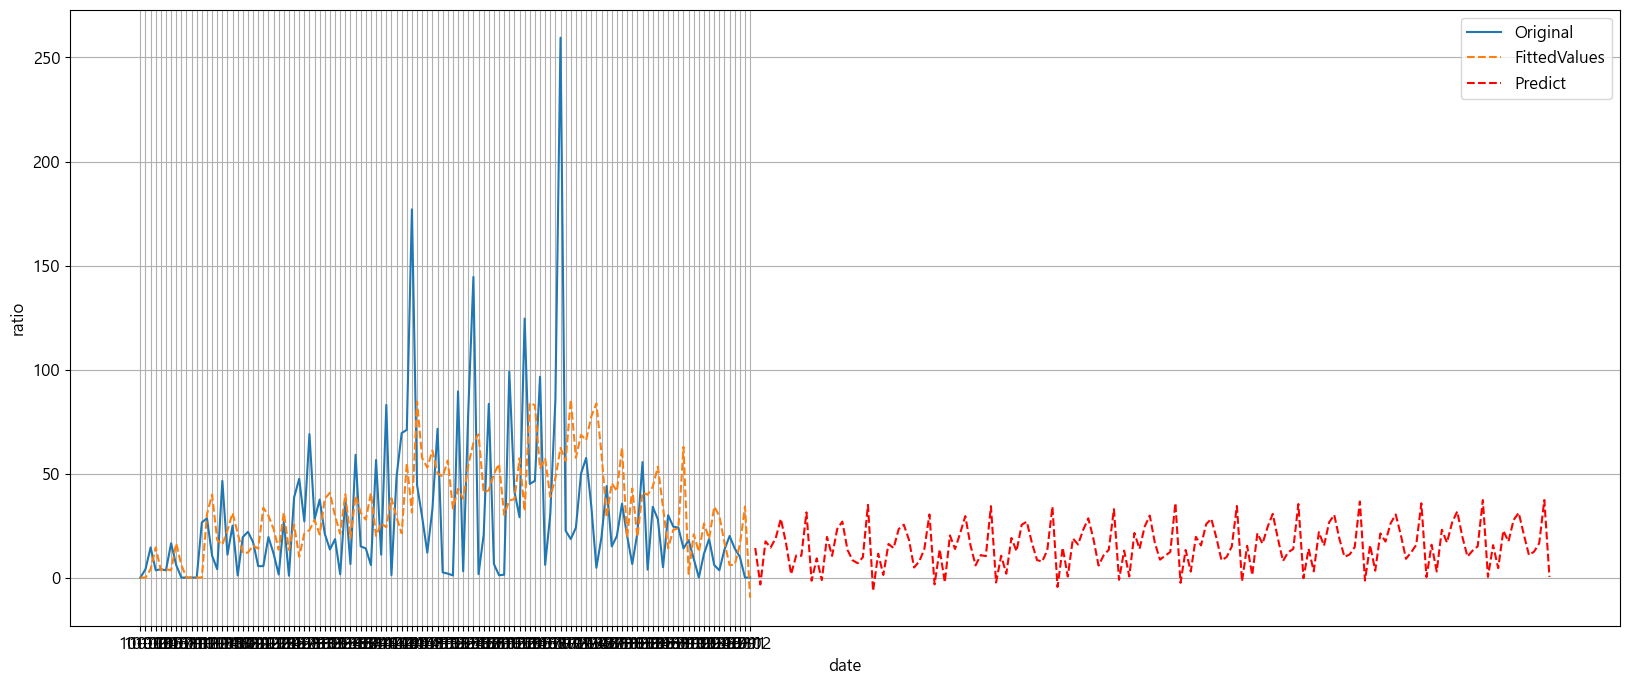

In [ ]:
plt.figure(figsize=(20,8))
sb.lineplot(data=melt_df, x=formatted_index,  y='value', label='Original')
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('date')
plt.ylabel('ratio')
plt.legend()


plt.grid()
plt.show()
plt.close()